### Machine Learning based approach

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

def load_and_preprocess_data(file_name):
    df = pd.read_csv(file_name)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['Lag_1'] = df['Units Sold'].shift(1)
    df.dropna(inplace=True)
    return df

def split_data(df):
    X = df[['Lag_1']]
    y = df['Units Sold']
    return train_test_split(X, y, test_size=0.2, shuffle=False)

def fit_and_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    return model.predict(X_test)

def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, rmse, mae

def plot_results(y_test, y_pred, title):
    plt.figure(figsize=(10,6))
    plt.plot(y_test.index, y_test, label='Actual Units Sold')
    plt.plot(y_test.index, y_pred, label='Forecasted Units Sold', color='red')
    plt.title(title)
    plt.legend()
    plt.show()

### Model Execution

#### Load and pre-process the data

In [2]:
df = load_and_preprocess_data('ProductSalesData.csv')

#### Split into train and test

In [3]:
X_train, X_test, y_train, y_test = split_data(df)

In [10]:
X_train.head(5)

,Lag_1
Date,
2010-01-02,59.0
2010-01-03,203.0
2010-01-04,33.0
2010-01-05,117.0
2010-01-06,71.0


#### SVM

In [16]:
from sklearn.svm import SVR

In [17]:
svm_model = SVR()

In [18]:
y_pred_svm = fit_and_predict(svm_model, X_train, y_train, X_test)

In [19]:
mse_svm, rmse_svm, mae_svm = evaluate_model(y_test, y_pred_svm)

In [20]:
print('Mean Squared Error:', mse_svm)
print('Root Mean Squared Error:', rmse_svm)
print('Mean Absolute Error:', mae_svm)

Mean Squared Error: 30717.93826290258
Root Mean Squared Error: 175.2653367409043
Mean Absolute Error: 146.8309981075176


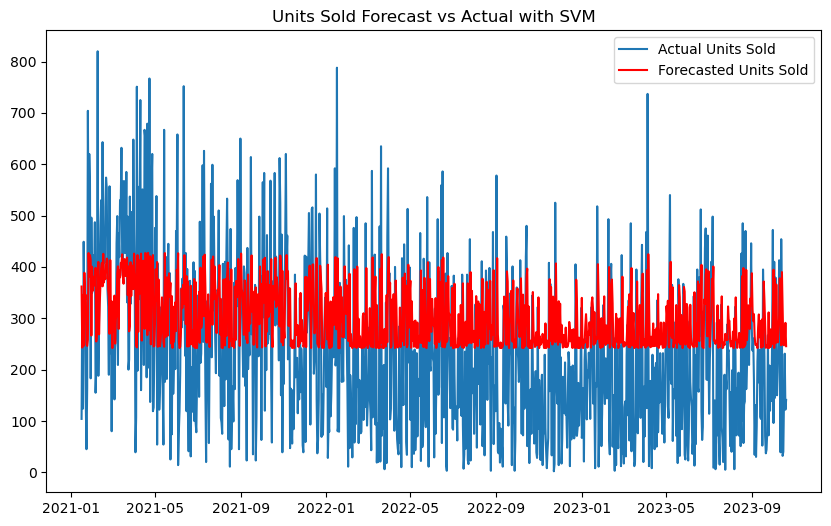

In [21]:
plot_results(y_test, y_pred_svm, 'Units Sold Forecast vs Actual with SVM')

#### KNN

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [24]:
y_pred_knn = fit_and_predict(knn_model, X_train, y_train, X_test)

In [25]:
mse_knn, rmse_knn, mae_knn = evaluate_model(y_test, y_pred_knn)

In [26]:
print('Mean Squared Error:', mse_knn)
print('Root Mean Squared Error:', rmse_knn)
print('Mean Absolute Error:', mae_knn)

Mean Squared Error: 36146.26813492064
Root Mean Squared Error: 190.12171926142642
Mean Absolute Error: 156.84345238095239


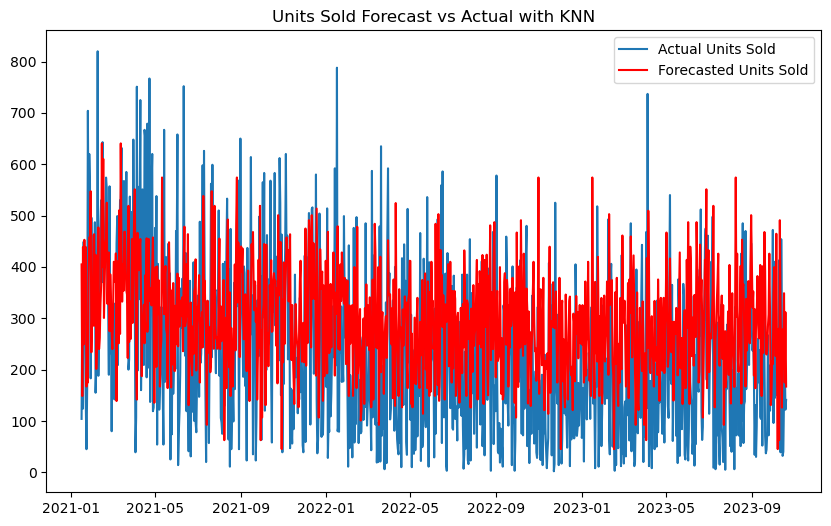

In [27]:
plot_results(y_test, y_pred_knn, 'Units Sold Forecast vs Actual with KNN')

#### Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf_model = RandomForestRegressor(n_estimators=100)

In [31]:
y_pred_rf = fit_and_predict(rf_model, X_train, y_train, X_test)

In [32]:
mse_rf, rmse_rf, mae_rf = evaluate_model(y_test, y_pred_rf)

In [33]:
print('Mean Squared Error:', mse_rf)
print('Root Mean Squared Error:', rmse_rf)
print('Mean Absolute Error:', mae_rf)

Mean Squared Error: 37481.6298468256
Root Mean Squared Error: 193.60172996857648
Mean Absolute Error: 158.8789766787894


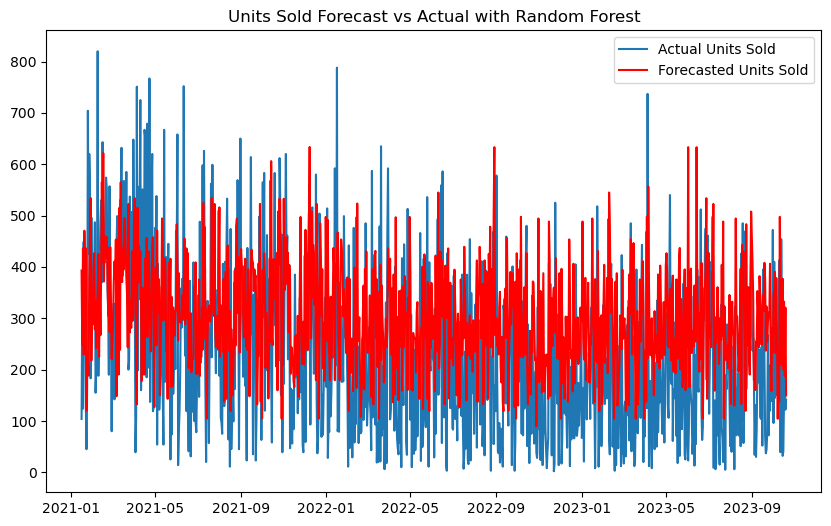

In [34]:
plot_results(y_test, y_pred_rf, 'Units Sold Forecast vs Actual with Random Forest')

#### Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
gb_model = GradientBoostingRegressor(n_estimators=100)

In [43]:
y_pred_gb = fit_and_predict(gb_model, X_train, y_train, X_test)

In [44]:
mse_gb, rmse_gb, mae_gb = evaluate_model(y_test, y_pred_gb)

In [45]:
print('Mean Squared Error:', mse_gb)
print('Root Mean Squared Error:', rmse_gb)
print('Mean Absolute Error:', mae_gb)

Mean Squared Error: 31976.61504444344
Root Mean Squared Error: 178.82006331629412
Mean Absolute Error: 149.4313760353675


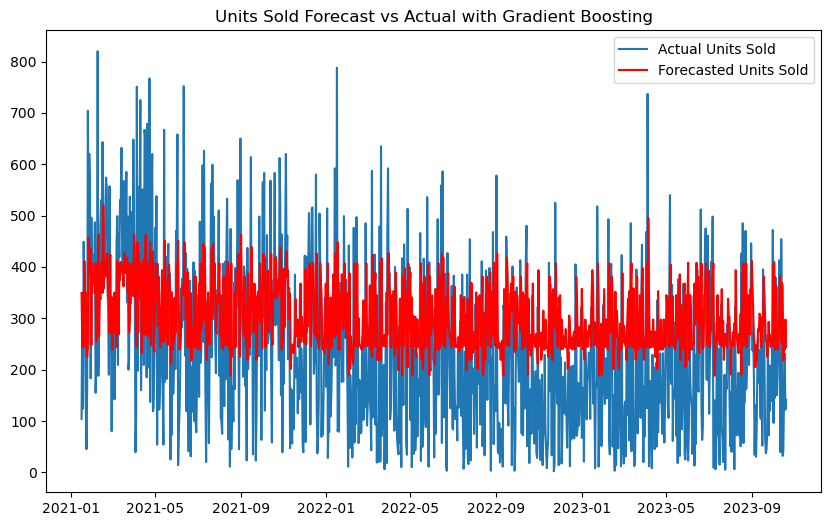

In [46]:
plot_results(y_test, y_pred_gb, 'Units Sold Forecast vs Actual with Gradient Boosting')